# Loan Approval Model

A large bank wants to develop a new feature that its loan applicants can use. The typical process of loan applications is such that applicants submit a list of required documents and bank assesses the application and validates the candidate's status to pre-qualify for a credit line, post to which the actual process of credit evaluation starts. This pre-qualification process takes 7 business days and is a huge committment of time and resources from the bank. The objective is to mine and analyze past data of loan pre-qualification status and assess online, whether the applicant is likely to get his loan approved or not.

<img src="../../../images/Loan_Approval.PNG" style="width:50vw"> 


## Data History

The data provided by the bank has 9 columns. The data dictionary is as given below:
1. Loan_ID: Unique identifier for each loan application. Alphanumeric in nature.
2. Gender: Gender of the primary loan applicant. Encoded variable - 1 stands for Male and 0 stands for Female.
3. Dependents: Total number of dependents (non-income generating) associated with the loan applicant, e.g., parents, spouse, children etc.
4. Self_Employed: Flag variable to report whether applicant is self-employed or not. 1 stands for self-employed and 0 stands for the opposite.
5. Applicant_Income: A floating point variable which denotes monthly income of the loan applicant in Rupees.
6. Loan_Amount: The amount of money the applicant desires to borrow from the bank. (Note that it is a floating point variable because it has added transaction overheads generated by application tracking tools.)
7. Loan_Amount_Term: The number of years in which the applicant expects to repay the loan amount.
8. Credit_History: Historic credit repayment standing of the loan applicant. Encoded variable - 1 stands for Good, 0 stands for Bad.
9. Loan_Status: Final result of bank's 7-day manual pre-qualification process.

## How to solve the problem?

Every problem that needs to be solved can be analyzed and broken down into sub-tasks and there could be a systematic approach to problem solving. Some of the generic steps to solving any problem are:

1. Determine the objective to be acheived and the desired outcome (Define the problem statement)
2. Analyze the available inputs and resources (Identification of what we have to work with - data, environment, systems etc.)
3. Analyze various approaches and determine the most suitable one (Evaluate the best approach to acheive desired outcome)
4. Execute the approach and observe results (Execute the selected model and validate results with expected outcome)
5. Revisit approach with learning from initial results (Optimize and tune the model to get better results with each iteration)


<img src="../../../images/workflow-solve.png" style="width:40vw"> 


## When to use Machine Learning?

With respect to this specific problem,

1. The main objective is to come up with an automated, self-service tool that can help applicants perform instant pre-qualification process for a desired loan.
2. The resource given to us is a data set and some functional process know-how of how a pre-qualification is actually performed.
3. Based on above information, there could be one or more ways of how this problem can be solved.
    a. Predictable process: If the loan pre-qualification process is done strictly based on defined rules and is completely predictable by all points of data that are controlled, then a simple processing logic which has a series of rules for each qualifier can help determine whether an applicant qualifies or not.
    b. Unpredictable process: However, if there is an unpredictability involved in how the pre-qualification process is executed, a simple set of rules may not really help. Let us assume that some level of power is vested in the loan approving officer to take a personal decision whether to approve a loan or not. In this case, there is an unpredictability as each loan officer differs in perception and may or may not approve a specific loan. This unpredictability cannot be modeled by a set of known rules, however, this trend can be learned from the given data.
    
This is where Machine Learning and Data Sciences excels, in identifying patterns and trends in data which has at least some degree of variance due to unknown factors.

In the above problem, let us assume that there is some amount of uncertainty in the way the pre-qualification process is executed - owing to government subsidies, recommendations, schemes, loan approving officer's personal judgment etc.

Let us try to identify a trend from the data using a classification model as the target variable 'Loan_Status' is a categorical variable with two possible values.

In [1]:
import numpy as np
import pandas as pd

loan_data = pd.read_csv("https://raw.githubusercontent.com/colaberry/DSin100days/master/data/loan_data.csv")
loan_data.head()

,Loan_ID,Gender,Dependents,Self_Employed,Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Loan_Status
0,CL_344287,1,1,0,831.22,24469.23446,4,0,Reject
1,CL_181239,0,1,0,545.44,12423.04443,6,1,Approve
2,CL_95584,0,1,0,588.95,17892.76538,8,1,Approve
3,CL_902301,1,2,0,638.59,11802.11966,3,0,Reject
4,CL_806736,0,2,0,642.69,10622.78327,7,0,Approve


In [2]:
# note that the describe method only shows stats of numerical features
loan_data.describe()

,Gender,Dependents,Self_Employed,Applicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,7901.000000,7901.000000,7901.000000,7901.000000,7.901000e+03,7901.000000,7901.000000
mean,0.511328,1.992533,0.131882,43688.358072,9.380457e+05,7.287432,0.498671
std,0.499903,1.168064,0.338384,32077.567187,7.473524e+05,5.532919,0.500030
min,0.000000,0.000000,0.000000,501.650000,6.895370e+03,2.000000,0.000000
25%,0.000000,1.000000,0.000000,17468.920000,3.563922e+05,4.000000,0.000000
50%,1.000000,2.000000,0.000000,39759.550000,8.112410e+05,5.000000,0.000000
75%,1.000000,3.000000,0.000000,63725.870000,1.347018e+06,9.000000,1.000000
max,1.000000,4.000000,1.000000,198822.630000,5.876457e+06,26.000000,1.000000


In [3]:
loan_data.shape

(7901, 9)

In [4]:
print(loan_data['Gender'].value_counts(),"\n")
print(loan_data['Self_Employed'].value_counts(),"\n")
print(loan_data['Credit_History'].value_counts(),"\n")

1    4040
0    3861
Name: Gender, dtype: int64 

0    6859
1    1042
Name: Self_Employed, dtype: int64 

0    3961
1    3940
Name: Credit_History, dtype: int64 



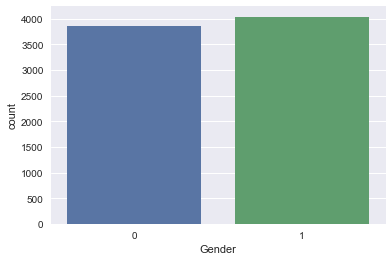

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(loan_data['Gender'],label="Count")
plt.show()

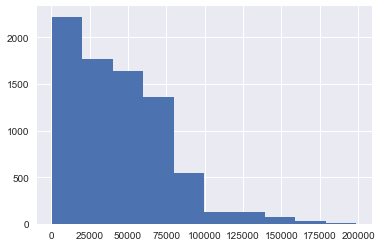

In [6]:
loan_data['Applicant_Income'].hist()

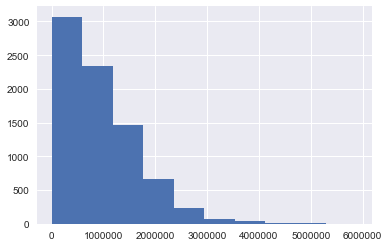

In [7]:
loan_data['Loan_Amount'].hist()

In [8]:
from sklearn.preprocessing import LabelEncoder

# dataset.Loan_Status.unique()
loan_data['Loan_Status'] = LabelEncoder().fit_transform(loan_data['Loan_Status'])


print(loan_data.dtypes,loan_data.head())

Loan_ID              object
Gender                int64
Dependents            int64
Self_Employed         int64
Applicant_Income    float64
Loan_Amount         float64
Loan_Amount_Term      int64
Credit_History        int64
Loan_Status           int64
dtype: object      Loan_ID  Gender  Dependents  Self_Employed  Applicant_Income  \
0  CL_344287       1           1              0            831.22   
1  CL_181239       0           1              0            545.44   
2   CL_95584       0           1              0            588.95   
3  CL_902301       1           2              0            638.59   
4  CL_806736       0           2              0            642.69   

   Loan_Amount  Loan_Amount_Term  Credit_History  Loan_Status  
0  24469.23446                 4               0            1  
1  12423.04443                 6               1            0  
2  17892.76538                 8               1            0  
3  11802.11966                 3               0            1  

# Note that "Approved" has been encoded as 0 and "Rejected" has been encoded as 1

In [9]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split #For K-fold cross validation


#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = LogisticRegression()
X = loan_data[['Gender','Dependents','Self_Employed','Applicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History']].values
Y = loan_data['Loan_Status'].values
X = X.reshape(X.shape[0],7)

model.fit(X,Y)
#Make predictions on training set:
predictions = model.predict(X)

#Print accuracy
accuracy = metrics.accuracy_score(predictions,Y)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

Accuracy : 53.170%


In [10]:
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.531702219591


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#import graphviz

X = loan_data[['Gender','Dependents','Self_Employed','Applicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History']].values
Y = loan_data['Loan_Status'].values

#X = X.reshape(X.shape[0],1)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                         feature_names=None,  
#                        class_names=None,  
#                         filled=True, rounded=True)  
#graph = graphviz.Source(dot_data)  
#graph

In [12]:
kfold = KFold(n_splits=10, random_state=7)
model = tree.DecisionTreeClassifier()
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.836000416073


# Decision Tree Classifier seems to have better accuracy as compared to a Logistic Regression Model

In [13]:
def get_prediction(loan_info):
    return clf.predict(loan_info)

loan_input = loan_data[['Gender','Dependents','Self_Employed','Applicant_Income','Loan_Amount','Loan_Amount_Term','Credit_History']].head(5)

In [14]:
loan_data.head()
print(get_prediction(loan_input))

[1 0 0 1 0]


## Front End App to Test Classification

The above model can be deployed on a hosted server and a front end interface can be created, where input is captured from Bank's customers using a form. This data so captured is fed into the model and the output predicted by the model is displayed to the customers. The app below is:

* Pre-deployed on Heroku
* Front end created using Plotly's Dash
* Back end prediction is powered by the Decision Tree coded above

In [1]:
# Importing libraries to display an iframe inside this notebook
from IPython import display
from IPython.display import IFrame

# URL where app is hosted and which needs to be embedded here
url = 'https://colaberry-dsin100-classif.herokuapp.com/'

# Creating an iframe element to see the dash application created and deployed at the URL
IFrame(url, width=1600, height=600)